# Static Plot of Path, Time, Height & Velocity
* Fix Parameters- No. of Frames and acceleration due to gravity
* Creating Time, Index, Height and Velocity arrays
* Saving Arrays with Plto parameters so that we can create a series of plots using a for loop
* Create Array of Labels and Titles
* Create Plots

In [15]:
t=np.linspace(0,tmax,no_frame)
t
index
ht
v

array([ 0.        ,  0.31146051,  0.62292103,  0.93438154,  1.24584205,
        1.55730257,  1.86876308,  2.18022359,  2.49168411,  2.80314462,
        3.11460513,  3.42606565,  3.73752616,  4.04898667,  4.36044719,
        4.6719077 ,  4.98336821,  5.29482873,  5.60628924,  5.91774975,
        6.22921027,  6.54067078,  6.85213129,  7.16359181,  7.47505232,
        7.78651283,  8.09797334,  8.40943386,  8.72089437,  9.03235488,
        9.3438154 ,  9.65527591,  9.96673642, 10.27819694, 10.58965745,
       10.90111796, 11.21257848, 11.52403899, 11.8354995 , 12.14696002,
       12.45842053, 12.76988104, 13.08134156, 13.39280207, 13.70426258,
       14.0157231 , 14.32718361, 14.63864412, 14.95010464, 15.26156515,
       15.57302566, 15.88448618, 16.19594669, 16.5074072 , 16.81886772,
       17.13032823, 17.44178874, 17.75324926, 18.06470977, 18.37617028,
       18.6876308 , 18.99909131, 19.31055182, 19.62201234, 19.93347285,
       20.24493336, 20.55639388, 20.86785439, 21.1793149 , 21.49

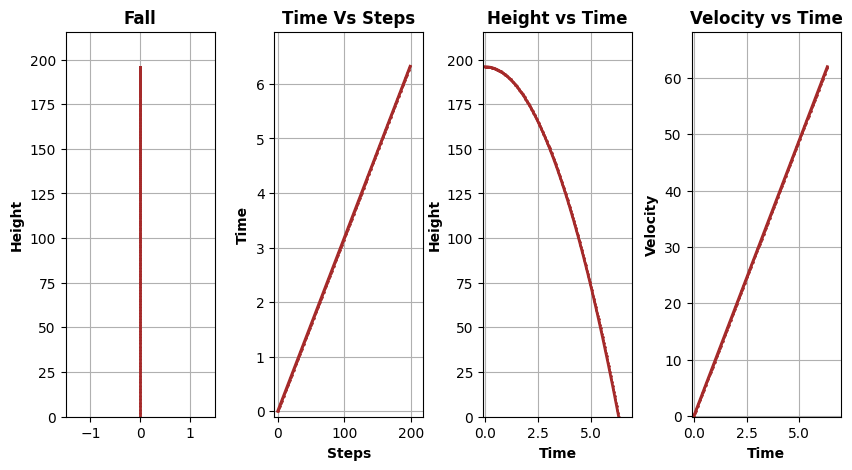

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Constants              
no_frame=200
g=9.8
    
h=196
tmax=np.sqrt(2*h/g)

#time, height, velocity arrays
t=np.linspace(0,tmax,no_frame)
index=np.linspace(0,no_frame-1,no_frame)
ht=h-0.5*g*t**2
v=g*t
    
#Save Plottable Arrays
x_arr=[np.zeros(len(ht)),index,t,t]
y_arr=[ht,t,ht,v]
x_min=[-1.5,-5,-.1,-.1]
x_max=[1.5,index.max()*1.1,tmax*1.1,tmax*1.1]
y_min=[-0.1,-0.1,-0.1,-0.1]
y_max=[h*1.1,tmax*1.1,h*1.1,v.max()*1.1]

#Titles and Labels for the Plots
title=['Fall','Time Vs Steps','Height vs Time','Velocity vs Time']
x_labels=['','Steps','Time','Time']
y_labels=['Height','Time','Height','Velocity']

#Plot Parameters
fig,ax=plt.subplots(1,4,figsize=(10,5))
plt.subplots_adjust(wspace=.4)

for j in range(0,4):#Getting 4 plots through a for loop            
    ax[j].grid(True)
    ax[j].set_xlim(x_min[j],x_max[j],auto=False)
    ax[j].set_ylim(y_min[j],y_max[j],auto=False)
    ax[j].set_title(title[j],fontweight='bold')
    ax[j].set_xlabel(x_labels[j],fontsize=10,fontweight='bold')
    ax[j].set_ylabel(y_labels[j],fontsize=10,fontweight='bold')
    ax[j].plot(x_arr[j], y_arr[j], 'brown',lw=2, marker='o', markersize=1) 

plt.show()

# Convert the Above into an Animation
* Change the %matplotlib inline to %matplotlib notebook
* Import Animation and the Pillow Writer
* Create a Marker Object
* Write the Update Loop

<IPython.core.display.Javascript object>


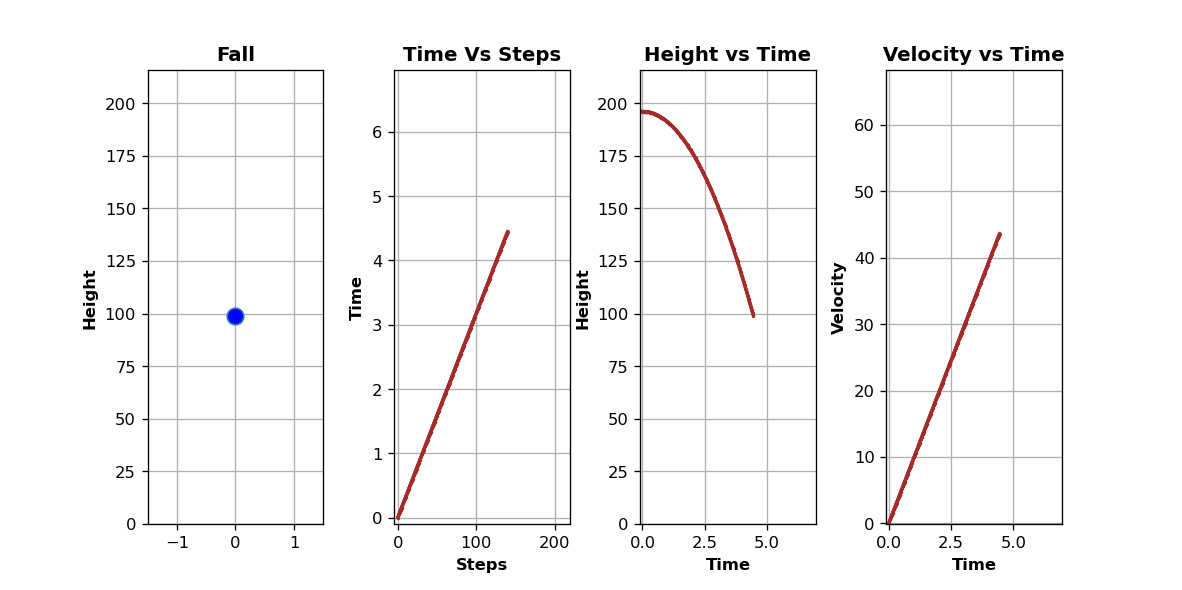

In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import animation
from matplotlib.animation import PillowWriter

# Constants              
no_frame=200
g=9.8
    
h=196
tmax=np.sqrt(2*h/g)

#time, height, velocity arrays
t=np.linspace(0,tmax,no_frame)
index=np.linspace(0,no_frame-1,no_frame)
ht=h-0.5*g*t**2
v=g*t
    
#Save Plottable Arrays
x_arr=[np.zeros(len(ht)),index,t,t]
y_arr=[ht,t,ht,v]
x_min=[-1.5,-5,-.1,-.1]
x_max=[1.5,index.max()*1.1,tmax*1.1,tmax*1.1]
y_min=[-0.1,-0.1,-0.1,-0.1]
y_max=[h*1.1,tmax*1.1,h*1.1,v.max()*1.1]

#Titles and Labels for the Plots
title=['Fall','Time Vs Steps','Height vs Time','Velocity vs Time']
x_labels=['','Steps','Time','Time']
y_labels=['Height','Time','Height','Velocity']

#Plot Parameters
fig,ax=plt.subplots(1,4,figsize=(10,5))
plt.subplots_adjust(wspace=.4)

#plot the ball
marker=ax[0].plot(x_arr[0][0], y_arr[0][0],marker='o', markersize=10,markerfacecolor='blue') [0]

def update(i):
        if i==0:#for Zeroth iteration clear the plots and reset them
            for j in range(0,4):
                if j!=0: ax[j].clear()        
                ax[j].grid(True)
                ax[j].set_xlim(x_min[j],x_max[j],auto=False)
                ax[j].set_ylim(y_min[j],y_max[j],auto=False)
                ax[j].set_title(title[j],fontweight='bold')
                ax[j].set_xlabel(x_labels[j],fontsize=10,fontweight='bold')
                ax[j].set_ylabel(y_labels[j],fontsize=10,fontweight='bold')        
        else:
            for j in range(0,4):
                if j==0:#Update the Marker Position                
                    marker.set_data(x_arr[j][i], y_arr[j][i])
                else:#Create a plot from previous position to the current position
                    ax[j].plot([x_arr[j][i-1], x_arr[j][i]], [y_arr[j][i-1], y_arr[j][i]], 'brown',lw=2, 
                               marker='o', markersize=1) 

ani= animation.FuncAnimation(fig, update, frames=range(no_frame), interval=10, blit=False,repeat=True)
#ani.save('fall_ball.gif', writer=PillowWriter(fps=30))

plt.show()

# Wrap the above Code in tkinter Window
* Create Tkinter Window with dropdown
* Embed a Canvas and Plot and reset buttons in it
* Place the above code for Plotting in a function called by the plot button
* Create a code for a reset function by clearing the dropdown and saving the animation

<IPython.core.display.Javascript object>


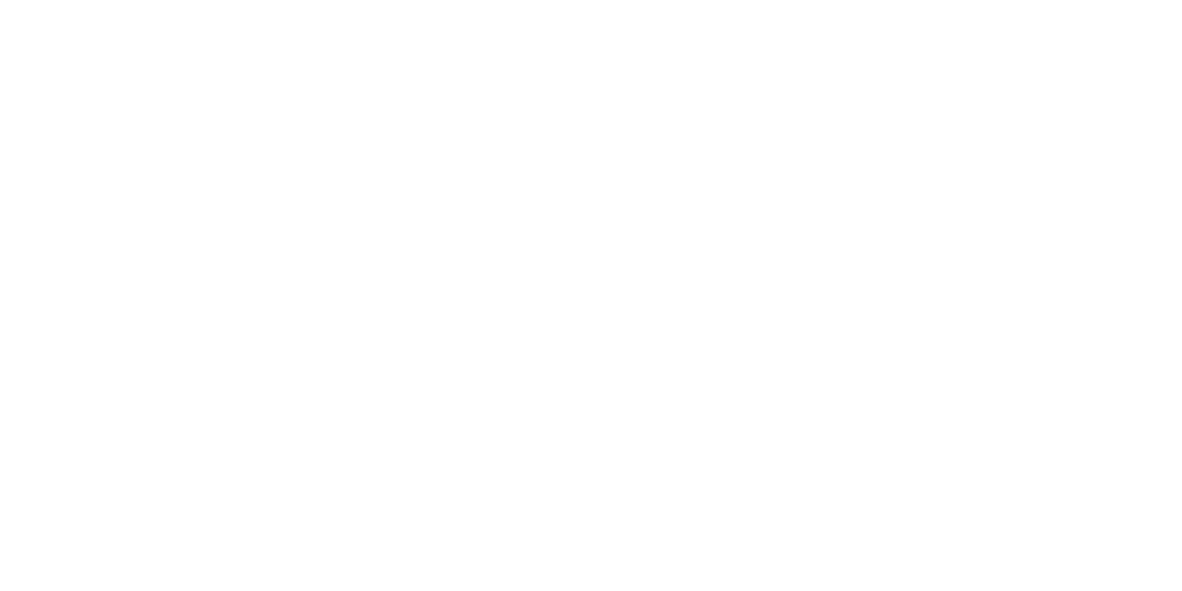

In [18]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from matplotlib.animation import PillowWriter

def gen_plot():
    global no_frame,g,title, x_labels,y_labels,ani,marker
    
    h=int(con_h.get())
    tmax=np.sqrt(2*h/g)
    t=np.linspace(0,tmax,no_frame)
    index=np.linspace(0,no_frame-1,no_frame)
    ht=h-0.5*g*t**2
    v=g*t
    
    #Save Plottable Arrays
    x_arr=[np.zeros(len(ht)),index,t,t]
    y_arr=[ht,t,ht,v]
    x_min=[-1.5,-5,-.1,-.1]
    x_max=[1.5,index.max()*1.1,tmax*1.1,tmax*1.1]
    y_min=[-0.1,-0.1,-0.1,-0.1]
    y_max=[h*1.1,tmax*1.1,h*1.1,v.max()*1.1]
    
    #plot the ball
    marker=ax[0].plot(x_arr[0][0], y_arr[0][0],marker='o', markersize=10,markerfacecolor='blue') [0]
    

    def update(i):
        if i==0:
            for j in range(0,4):
                if j!=0: ax[j].clear()        
                ax[j].grid(True)
                ax[j].set_xlim(x_min[j],x_max[j],auto=False)
                ax[j].set_ylim(y_min[j],y_max[j],auto=False)
                ax[j].set_title(title[j],fontweight='bold')
                ax[j].set_xlabel(x_labels[j],fontsize=10,fontweight='bold')
                ax[j].set_ylabel(y_labels[j],fontsize=10,fontweight='bold')        
        else:
            for j in range(0,4):
                if j==0:                
                    marker.set_data(x_arr[j][i], y_arr[j][i])
                else:
                    ax[j].plot([x_arr[j][i-1], x_arr[j][i]], [y_arr[j][i-1], y_arr[j][i]], 'brown',lw=2, 
                               marker='o', markersize=1) 
    ani= animation.FuncAnimation(fig, update, frames=range(no_frame), interval=10, blit=False,repeat=False)
    canvas.draw()
    plot_button.config(state=tk.DISABLED)
    dropdown.config(state=tk.DISABLED)

def reset():
    global ani,ann
    ani.save('fall_ball.gif', writer=PillowWriter(fps=30))
    for j in range(0,4):
        ax[j].clear()
    marker.remove()
    canvas.draw()
    plot_button.config(state=tk.NORMAL)
    dropdown.config(state=tk.NORMAL)
    
    if ani is not None:             
        ani = None
    
    
# Constants              
no_frame=200
g=9.8

# Create root window
root = tk.Tk()
root.title("Vertically Falling Ball Simulator")
root.geometry("1100x650")

# Create dropdown for angle selection
con_h = tk.StringVar(value='196')
h_values = [98,196,294,392]
dropdown = ttk.Combobox(root, textvariable=con_h, values=h_values, state='readonly')
dropdown.place(x=190, y=25, width=70, height=30)


# Create Plot and Reset buttons
plot_button = tk.Button(root, text="Plot", command=gen_plot)
plot_button.place(x=115, y=60, width=70, height=30)
reset_button = tk.Button(root, text="Reset", command=reset)
reset_button.place(x=275, y=60, width=70, height=30)

#Plot Parameters
fig,ax=plt.subplots(1,4,figsize=(10,5))
plt.subplots_adjust(wspace=.4)

title=['Fall','Time Vs Steps','Height vs Time','Velocity vs Time']
x_labels=['','Steps','Time','Time']
y_labels=['Height','Time','Height','Velocity']

# Embed the matplotlib plot in the tkinter window
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().place(x=50, y=100)
tk.mainloop()

In [13]:
!pip install pyinstaller


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 1.3/1.3 MB 1.7 MB/s eta 0:00:00
     ------------------------------------ 256.8/256.8 kB 986.1 kB/s eta 0:00:00
     -------------------------------------- 71.8/71.8 kB 992.8 kB/s eta 0:00:00


In [17]:
!pyinstaller.exe --onefile C:\Users\dyrwf\Downloads\create_installer.py

438 INFO: PyInstaller: 5.9.0
438 INFO: Python: 3.11.0
453 INFO: Platform: Windows-10-10.0.22621-SP0
453 INFO: wrote C:\Users\dyrwf\python\virtuals\Simulations_physics\create_installer.spec
453 INFO: UPX is not available.
453 INFO: Extending PYTHONPATH with paths
['C:\\Users\\dyrwf\\Downloads']
1081 INFO: checking Analysis
1081 INFO: Building Analysis because Analysis-00.toc is non existent
1081 INFO: Initializing module dependency graph...
1083 INFO: Caching module graph hooks...
1093 INFO: Analyzing base_library.zip ...
4710 INFO: Loading module hook 'hook-encodings.py' from 'C:\\Users\\dyrwf\\python\\virtuals\\ocr\\Lib\\site-packages\\PyInstaller\\hooks'...
9935 INFO: Loading module hook 'hook-pickle.py' from 'C:\\Users\\dyrwf\\python\\virtuals\\ocr\\Lib\\site-packages\\PyInstaller\\hooks'...
14985 INFO: Loading module hook 'hook-heapq.py' from 'C:\\Users\\dyrwf\\python\\virtuals\\ocr\\Lib\\site-packages\\PyInstaller\\hooks'...
23207 INFO: Caching module dependency graph...
23427 INF